<a href="https://colab.research.google.com/github/PallalaArunkumar/Data_Science/blob/main/Innomatics_Datascience_genai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd


In [2]:
df1 = pd.read_csv('/content/movies.csv')
df2 = pd.read_csv('/content/ratings_csv.csv')
df3 = pd.read_csv('/content/tags.csv')

In [27]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df1.shape

(9742, 3)

In [4]:
df2.shape

(100836, 4)

In [5]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
unique_genres = df2['userId'].unique()
print(" unique userId ",len(unique_genres))

 unique userId  610


In [10]:
type(unique_genres)

numpy.ndarray

In [11]:
user_len = list(unique_genres)

In [23]:
max_users = df2['movieId'].value_counts()

In [25]:
max_user_id = max_users.idxmax()
max_user_id

356

In [28]:
df1[df1['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [34]:
terminator_id = df1[df1['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]


ratings = df2[df2['movieId'] == terminator_id]['rating']


average_rating = ratings.mean()

In [35]:
average_rating

3.970982142857143

In [36]:
import matplotlib.pyplot as plt

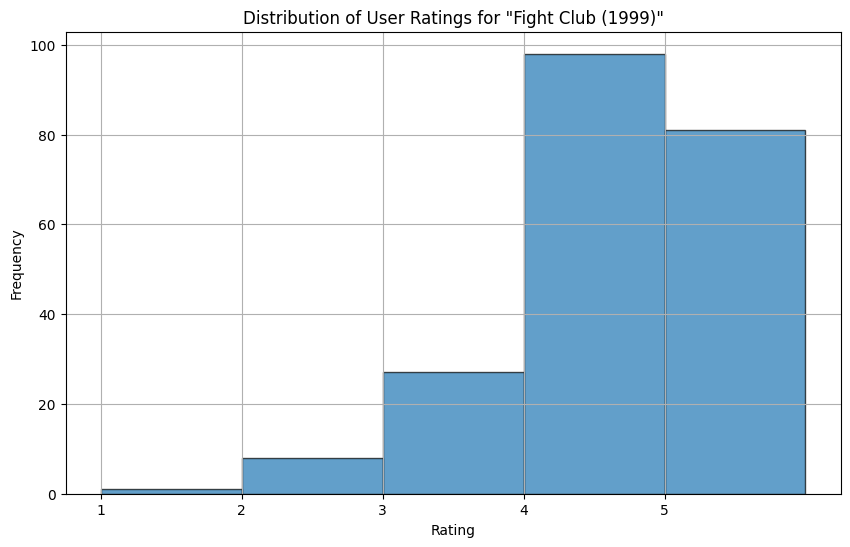

In [37]:
movie_id = df1[df1['title'] == 'Fight Club (1999)']['movieId'].values[0]


ratings = df2[df2['movieId'] == movie_id]['rating']


plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=range(1, 7), edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


In [38]:
rating_stats = df2.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

In [40]:
df5 = pd.merge(df1, rating_stats, on='movieId')


popular_movies = df5[df5['rating_count'] > 50]

most_popular_movie = popular_movies.loc[popular_movies['average_rating'].idxmax()]

print("The most popular movie based on average user ratings is:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['average_rating']:.2f}")

rating_counts = df2.groupby('movieId').size().reset_index(name='rating_count')

movies_with_counts = pd.merge(df1, rating_counts, on='movieId')

top_5_movies = movies_with_counts.sort_values(by='rating_count', ascending=False).head(5)

print("Top 5 popular movies based on the number of user ratings are:")
for index, row in top_5_movies.iterrows():
    print(f"Title: {row['title']}, Number of Ratings: {row['rating_count']}")

The most popular movie based on average user ratings is:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Top 5 popular movies based on the number of user ratings are:
Title: Forrest Gump (1994), Number of Ratings: 329
Title: Shawshank Redemption, The (1994), Number of Ratings: 317
Title: Pulp Fiction (1994), Number of Ratings: 307
Title: Silence of the Lambs, The (1991), Number of Ratings: 279
Title: Matrix, The (1999), Number of Ratings: 278


In [43]:
sci_fi = df1[df1['genres'].str.contains('Sci-Fi')]

rating_counts = df2.groupby('movieId').size().reset_index(name='rating_count')

sci_fi_with_counts = pd.merge(sci_fi, rating_counts, on='movieId')


sorted_sci_fi = sci_fi_with_counts.sort_values(by='rating_count', ascending=False).reset_index(drop=True)
third_most_popular_sci_fi = sorted_sci_fi.iloc[2]


print(f"Number of Ratings:{ third_most_popular_sci_fi['title']}, {third_most_popular_sci_fi['rating_count']}")

Number of Ratings:Jurassic Park (1993), 238


In [31]:
import requests
from bs4 import BeautifulSoup

ratings_csv = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')


rating_stats = ratings_csv.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
rating_stats.columns = ['movieId', 'rating_count', 'rating_mean']
movie_data = pd.merge(rating_stats, movies, on='movieId')


popular_movies = movie_data[movie_data['rating_count'] > 50]


popular_movies = pd.merge(popular_movies, links, on='movieId')


In [32]:
def get_imdb_rating(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    print(imdb_rating)
    return imdb_rating.text if imdb_rating else np.nan

def scrapper(imdbId):
    # Format IMDb ID to include leading zeroes if necessary
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    # Define the request headers
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }


    response = requests.get(URL, headers=request_header)


    soup = BeautifulSoup(response.text, 'html.parser')


    imdb_rating = soup.find('span', itemprop='ratingValue')


    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
# Add IMDb ratings_csv to the dataframe
popular_movies['imdb_rating'] = popular_movies['imdbId'].apply(get_imdb_rating)

popular_movies.to_csv('popular_movies.csv', index=False)

# Find the movie with the highest IMDb rating
highest_rated_movie = popular_movies.loc[popular_movies['imdb_rating'].idxmax()]

# Find the movie with the highest IMDb rating in Sci-Fi genre
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

# Output results
highest_rated_movie_id = highest_rated_movie['movieId']
highest_rated_sci_fi_movie_id = highest_rated_sci_fi['movieId']

print(f"Movie ID with the highest IMDb rating: {highest_rated_movie_id}")
print(f"Sci-Fi Movie ID with the highest IMDb : {highest_rated_sci_fi_movie_id}")